# Plotting Networks

In [1]:
# Import stuff

from matplotlib import pyplot as plt, colors, gridspec
import seaborn as sns, pandas as pd, numpy as np
import os,sys,glob, scipy
from Bio import Entrez
import networkx as nx

%matplotlib inline
%pylab inline 


/Users/AmandaE/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/AmandaE/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
### make graph from list

# fake list of publications:
rri_pubs = [['Bezgin','Solodkin', 'McIntosh'],
            ['McIntosh','Jirsa','Spiegler'],
            ['Shen','McIntosh','Fatima','Misic'],
            ['Griffiths','Misic','McIntosh','Fatima'],
            ['Jirsa','Ritter','McIntosh','Spiegler','Griffiths','Solodkin'],
            ['Griffiths','Jirsa','McIntosh','Ritter','Zimmerman'],
            ['Misic','Sporns','Fatima','Griffiths','McIntosh'],
            ['Ritter','Jirsa','McIntosh'],
            ['Shen','Griffiths','Fatima','Misic','McIntosh'],
            ['Misic','Sporns','Spiegler','Griffiths','McIntosh'],
            ['Ritter','Shen','Griffiths','Fatima','McIntosh'],
            ['Griffiths','Shen','McIntosh','Jirsa'],
            ['Zimmerman','Solodkin','Ritter','McIntosh'],
            ['Bezgin','Shen','Misic','McIntosh','Jirsa'],
            ['McIntosh','Jirsa'],
            ['Jirsa','McIntosh','Ritter','Solodkin'],
            ['Zimmerman','Ritter','Shen','McIntosh']]

# these three steps result in a list of all authors, sorted alphabetically
authors = set(x for l in rri_pubs for x in l)
authors = list(authors)
authors = sorted(authors)

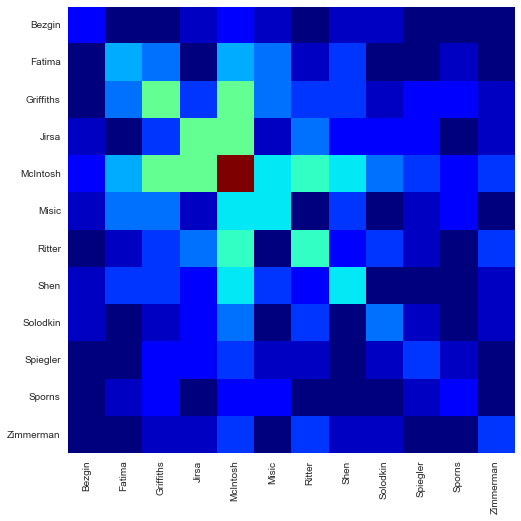

In [3]:
# Make an adjacency matrix showing how many times each author published with every other author.

author_graph = np.zeros([len(authors),len(authors)])

for pub in range(len(rri_pubs)):
    for a1 in range(len(authors)):
        for a2 in range(len(authors)):
            article = rri_pubs[pub]
            if authors[a1] in article and authors[a2] in article:
                author_graph[a1,a2] = author_graph[a1,a2] + 1
                author_graph[a2,a1] = author_graph[a2,a1] + 1
                

# Plot adjacency matrix

fig = figure(figsize(8,8))
ax = subplot(1,1,1)
plt.imshow(author_graph,interpolation='nearest',cmap='jet')
ax.grid(False)
ax.set_xticks(np.linspace(0,len(authors)-1,len(authors)))
ax.set_xticklabels(authors,rotation=90)
ax.set_yticks(np.linspace(0,len(authors)-1,len(authors)))
ax.set_yticklabels(authors)

In [4]:
# Convert adjacency matrix to networkx graph

G = nx.Graph()

for a1 in range(len(author_graph)):
    for a2 in range(len(author_graph)):
        G.add_edge(a1,a2,weight=int(author_graph[a1,a2]))
        
# This should also work (according to a tutorial), but in practice it doesn't :(
# G = nx.convert_matrix.from_numpy_matrix(author_graph.astype(int), create_using = nx.MultiGraph())

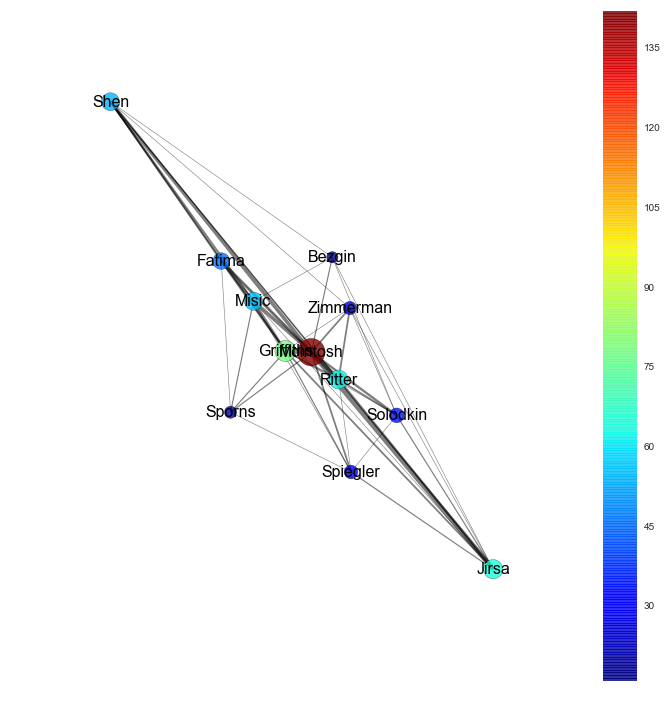

In [5]:
## Plot graph

pos=nx.spring_layout(G) # makes positions for the nodes

fig = figure(figsize(12,12))

# Draw nodes (size and color proportional to node strength)
Gnodes = nx.draw_networkx_nodes(G, pos, 
                       node_color=np.sum(author_graph,axis=0), cmap='jet',
                       node_size=5.0*np.sum(author_graph,axis=0)+50.0*np.ones([1,len(author_graph)]),
                       edge_cmap='jet',
                       alpha=0.8)
plt.colorbar(Gnodes)

# Label nodes with author names
labels = {}
for a in range(len(authors)):
    labels[a] = authors[a]
nx.draw_networkx_labels(G,pos,labels,font_size=16)

# Draw edges (change scaling factor for edge width if necessary)
scaling_factor = 10.0
weights = [G[u][v]['weight'] for u,v in G.edges()]
weights = [float(i) for i in weights]
weights = [i/max(weights)*scaling_factor for i in weights]
nx.draw_networkx_edges(G,pos,width=weights,edge_color='black',alpha=0.5,edge_cmap='jet')

plt.axis('off')
plt.show()